In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X=df.drop('Wine',axis=1)
y=df['Wine']

### LASSO Regression
This is 'L1' Regularization and brings the coefficients to zero. Thus helps us in retriving the features with significance

In [4]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso,LogisticRegression
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit_transform(X,y)
selected_feat = X.columns[(sel_.get_support())]
selected_feat

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

### Ridge Regression
This is 'L2' Regularization and "Does Not" compress the coefficients to zero. This helps us in retriving the features with the help of high value coefficients as prominent features

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso,LogisticRegression
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2',solver='liblinear'))
sel_.fit_transform(X,y)
selected_feat = X.columns[(sel_.get_support())]
selected_feat

Index(['Alcohol', 'Malic.acid', 'Ash', 'Flavanoids', 'Proanth', 'Color.int',
       'OD'],
      dtype='object')

### feature_importances_ of any Tree Algorithm
This attribute of any classifier helps us to retrieve feature scores which is calculated on basis of the split capacity. We leverage this methodology which is often used by tree algorithms and thus retrieve useful features

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dec_clf.fit(X,y)
for name, importance in zip(X, dec_clf.feature_importances_):
    print(name, "=", importance)

Alcohol = 0.04727507393151268
Malic.acid = 0.0
Ash = 0.0
Acl = 0.0
Mg = 0.0329784450464887
Phenols = 0.0
Flavanoids = 0.1414466773122087
Nonflavanoid.phenols = 0.0
Proanth = 0.0
Color.int = 0.0
Hue = 0.08378677906228588
OD = 0.3120425747831769
Proline = 0.38247044986432716


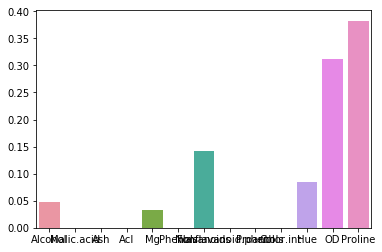

In [20]:
sns.barplot(X.columns,dec_clf.feature_importances_)
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X,y)
for name, importance in zip(X, rnd_clf.feature_importances_):
    print(name, "=", importance)

Alcohol = 0.13119389530034772
Malic.acid = 0.030277064705572145
Ash = 0.013393495418324056
Acl = 0.030729848025538156
Mg = 0.026554962081689924
Phenols = 0.049087931773995834
Flavanoids = 0.16684228537283205
Nonflavanoid.phenols = 0.009544727589434965
Proanth = 0.022164897847397225
Color.int = 0.16046680352181594
Hue = 0.08465321824948957
OD = 0.11141122375995682
Proline = 0.16367964635360555


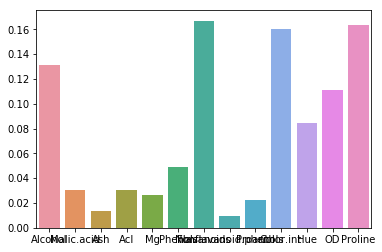

In [12]:
sns.barplot(X.columns,rnd_clf.feature_importances_)
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier(n_estimators=500, random_state=42)
xgb_clf.fit(X,y)
for name, importance in zip(X, xgb_clf.feature_importances_):
    print(name, "=", importance)

Alcohol = 0.01505611568050401
Malic.acid = 0.03448856115201714
Ash = 0.014254938346710364
Acl = 0.002978487051388913
Mg = 0.016144564147921408
Phenols = 0.0030815889615735956
Flavanoids = 0.18149412326392156
Nonflavanoid.phenols = 0.002244372936975078
Proanth = 0.00025372194435119245
Color.int = 0.29499302944352696
Hue = 0.006550860158853349
OD = 0.15457202002754702
Proline = 0.27388761688470953


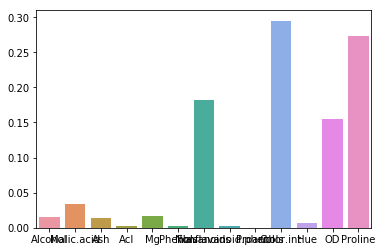

In [15]:
sns.barplot(X.columns,xgb_clf.feature_importances_)
plt.show()